In [9]:
from incremental_explainer.utils.saliency_maps import compute_saliency_maps
import pandas as pd
import cv2
from ultralytics import YOLO

image_location = f"datasets/split-1/00000001.jpg"
print(f"Processing image: {image_location}")
model = YOLO("yolov8n.pt")
img = cv2.imread(image_location)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model(img, verbose=False)
saliency = compute_saliency_maps(results, image_location, model, nummasks=5000)

Processing image: datasets/split-1/00000001.jpg


100%|██████████| 4999/4999 [02:47<00:00, 29.86it/s] 


In [10]:
import numpy as np

saliency_map = np.array(saliency[0]['detection']).transpose(1, 2, 0)
saliency_map.shape

(720, 1280, 3)

In [11]:
from incremental_explainer.utils.common import calculate_intersection_over_union

des_class = 2
des_bounding_box = [239.66, 309.78, 547.53, 469.6]

arrays = list(zip(np.array(results[0].boxes.cls), np.array(results[0].boxes.conf), np.array(results[0].boxes.xyxy)))

arrays = [el for el in arrays if el[0] == des_class]


max([el[1]* calculate_intersection_over_union(des_bounding_box, el[2]) for el in arrays])


0.9083503094040128

In [12]:
arrays

[(2.0,
  0.90839535,
  array([     239.66,      309.78,      547.53,       469.6], dtype=float32)),
 (2.0,
  0.8367078,
  array([     1106.1,      269.28,      1279.5,      437.56], dtype=float32)),
 (2.0,
  0.7652841,
  array([    0.36029,      295.38,      237.43,      614.21], dtype=float32)),
 (2.0,
  0.48621297,
  array([     910.43,      309.08,      1039.3,      347.77], dtype=float32)),
 (2.0,
  0.41226992,
  array([     250.89,      400.89,      1270.7,      708.22], dtype=float32))]

In [13]:
2==2.0

True

0.01927659130089878

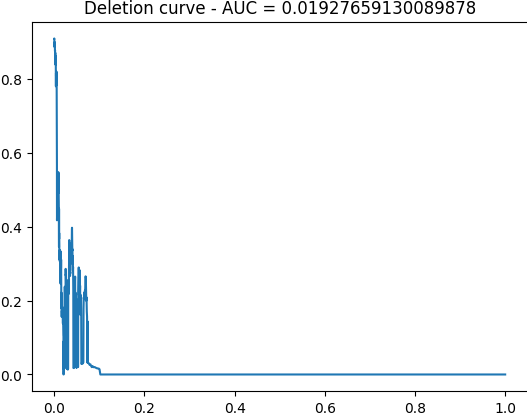

In [14]:
from incremental_explainer.metrics.deletion import compute_deletion


index = 0

compute_deletion(model, np.array(saliency[0]['detection']).transpose(1, 2, 0), img, int(results[0].boxes.cls[index]), np.array(results[0].boxes.xyxy[index]), divisions = 1000, verbose = True)

In [15]:
from incremental_explainer.metrics.insertion import compute_insertion

index = 0

compute_insertion(model, np.array(saliency[0]['detection']).transpose(1, 2, 0), img, int(results[0].boxes.cls[index]), np.array(results[0].boxes.xyxy[index]), divisions = 1000)

0.7432662846856773